In [1]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2. Image Enhancement
## 2.1 Histogram

/Users/fengqiaojun/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


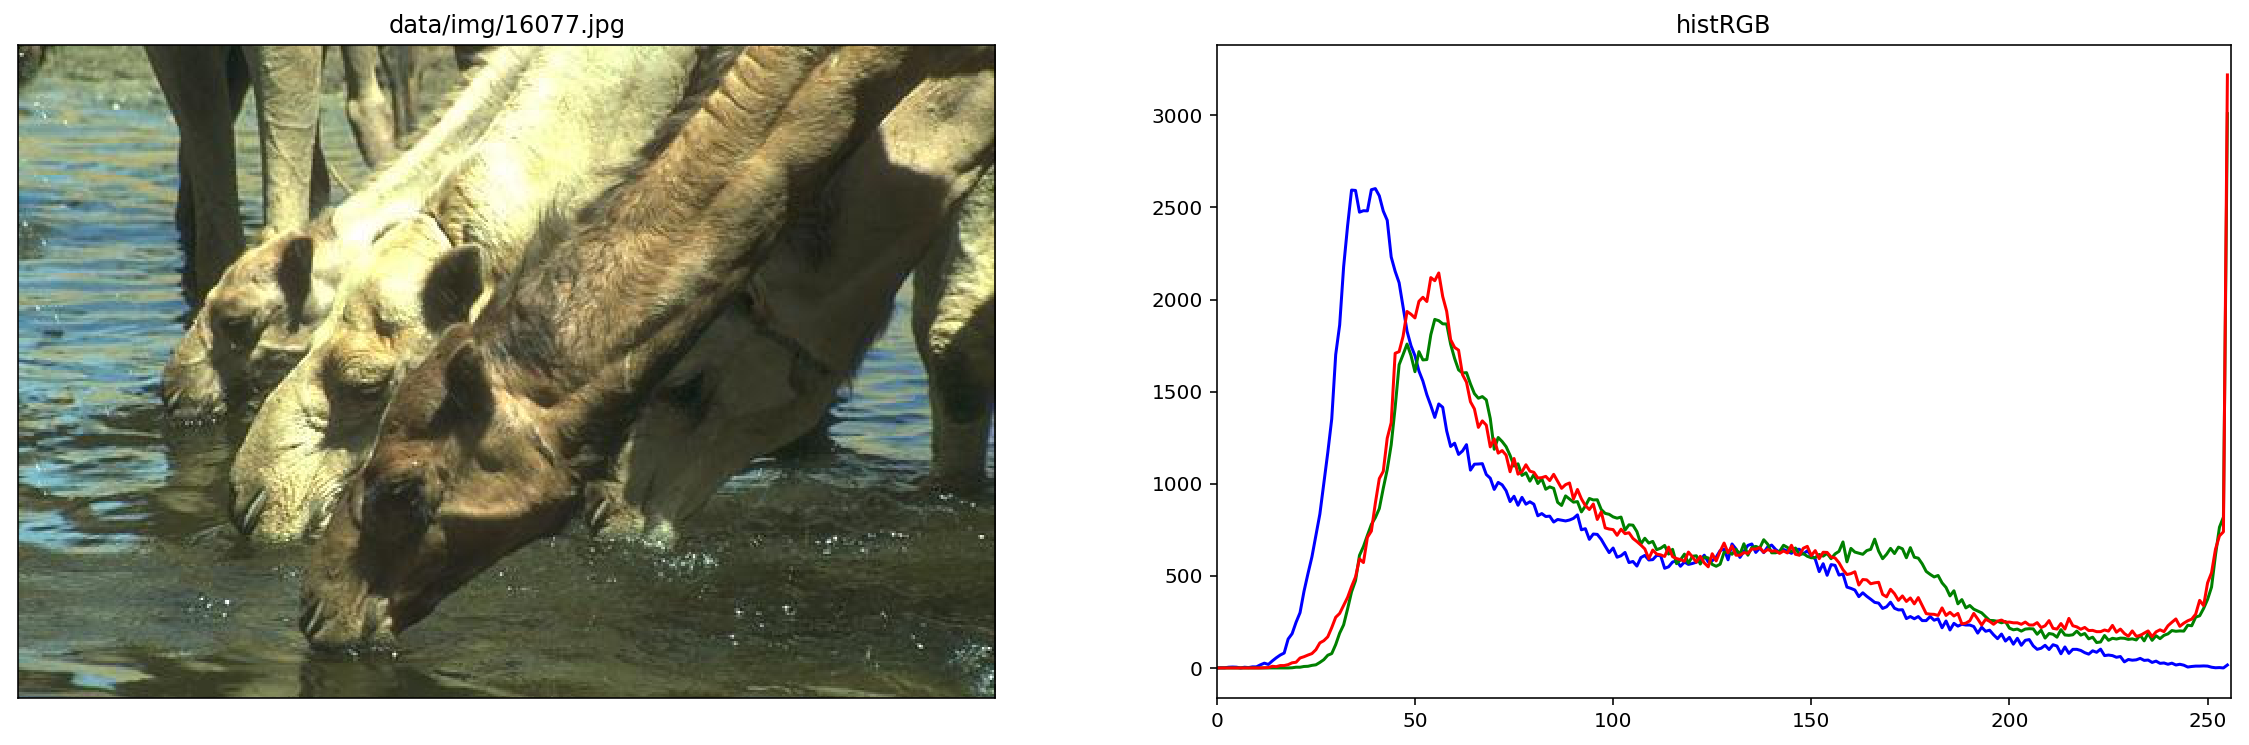

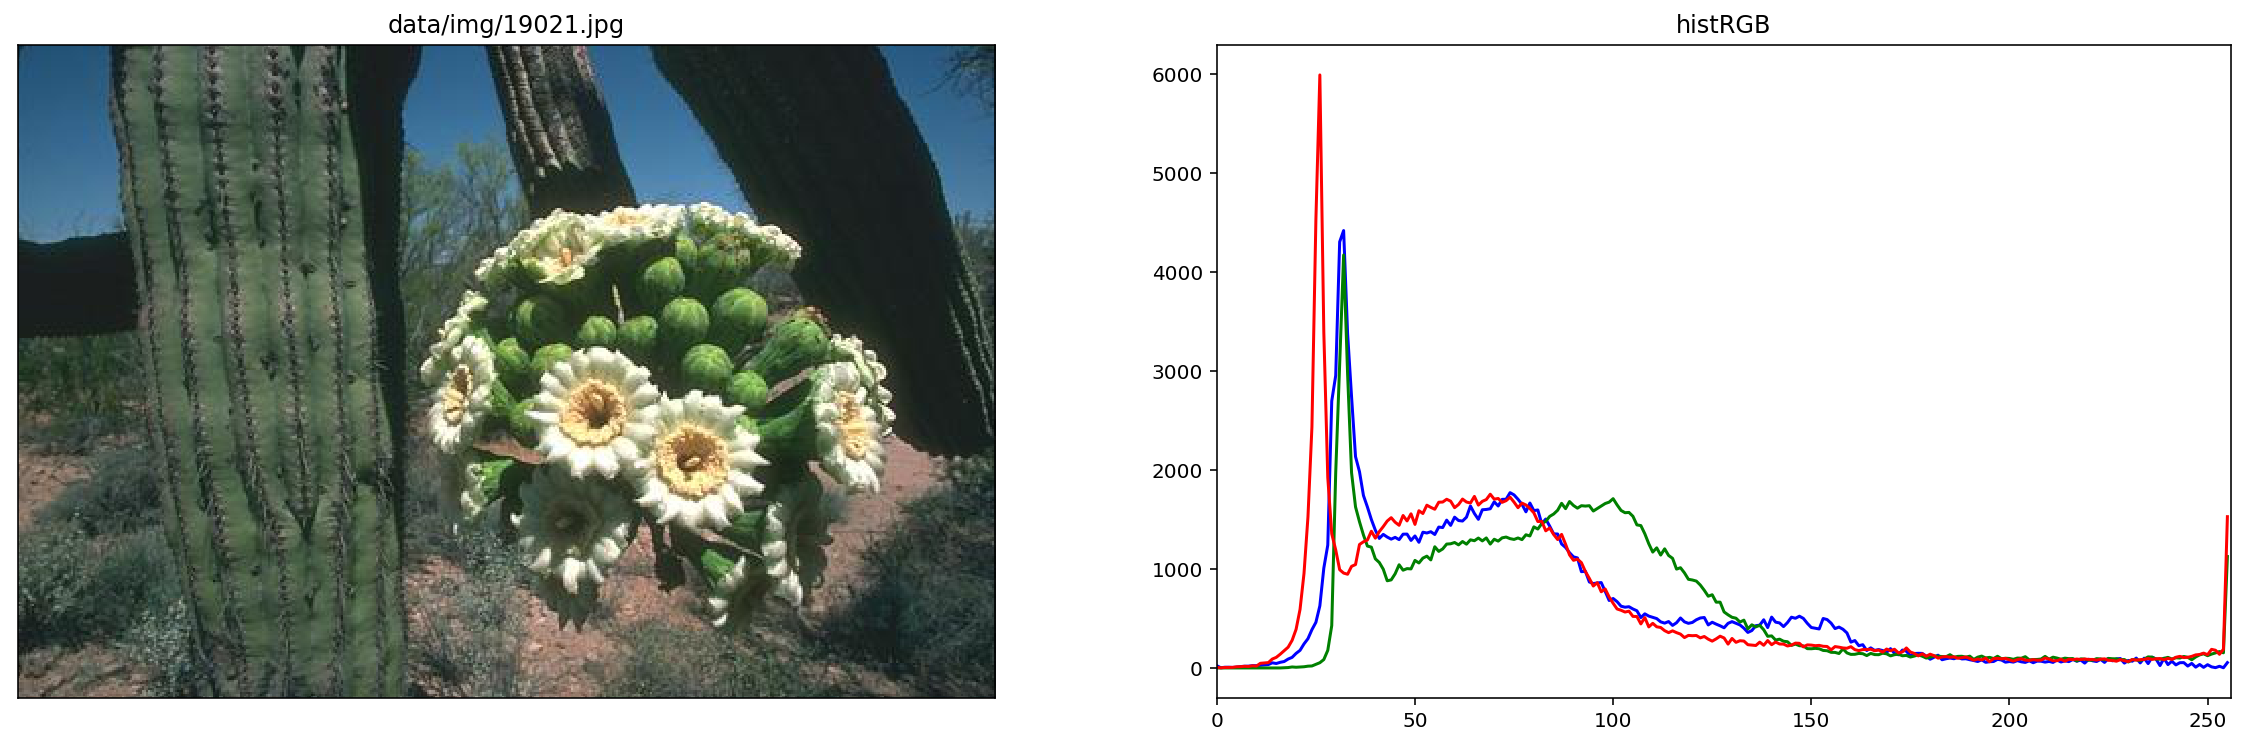

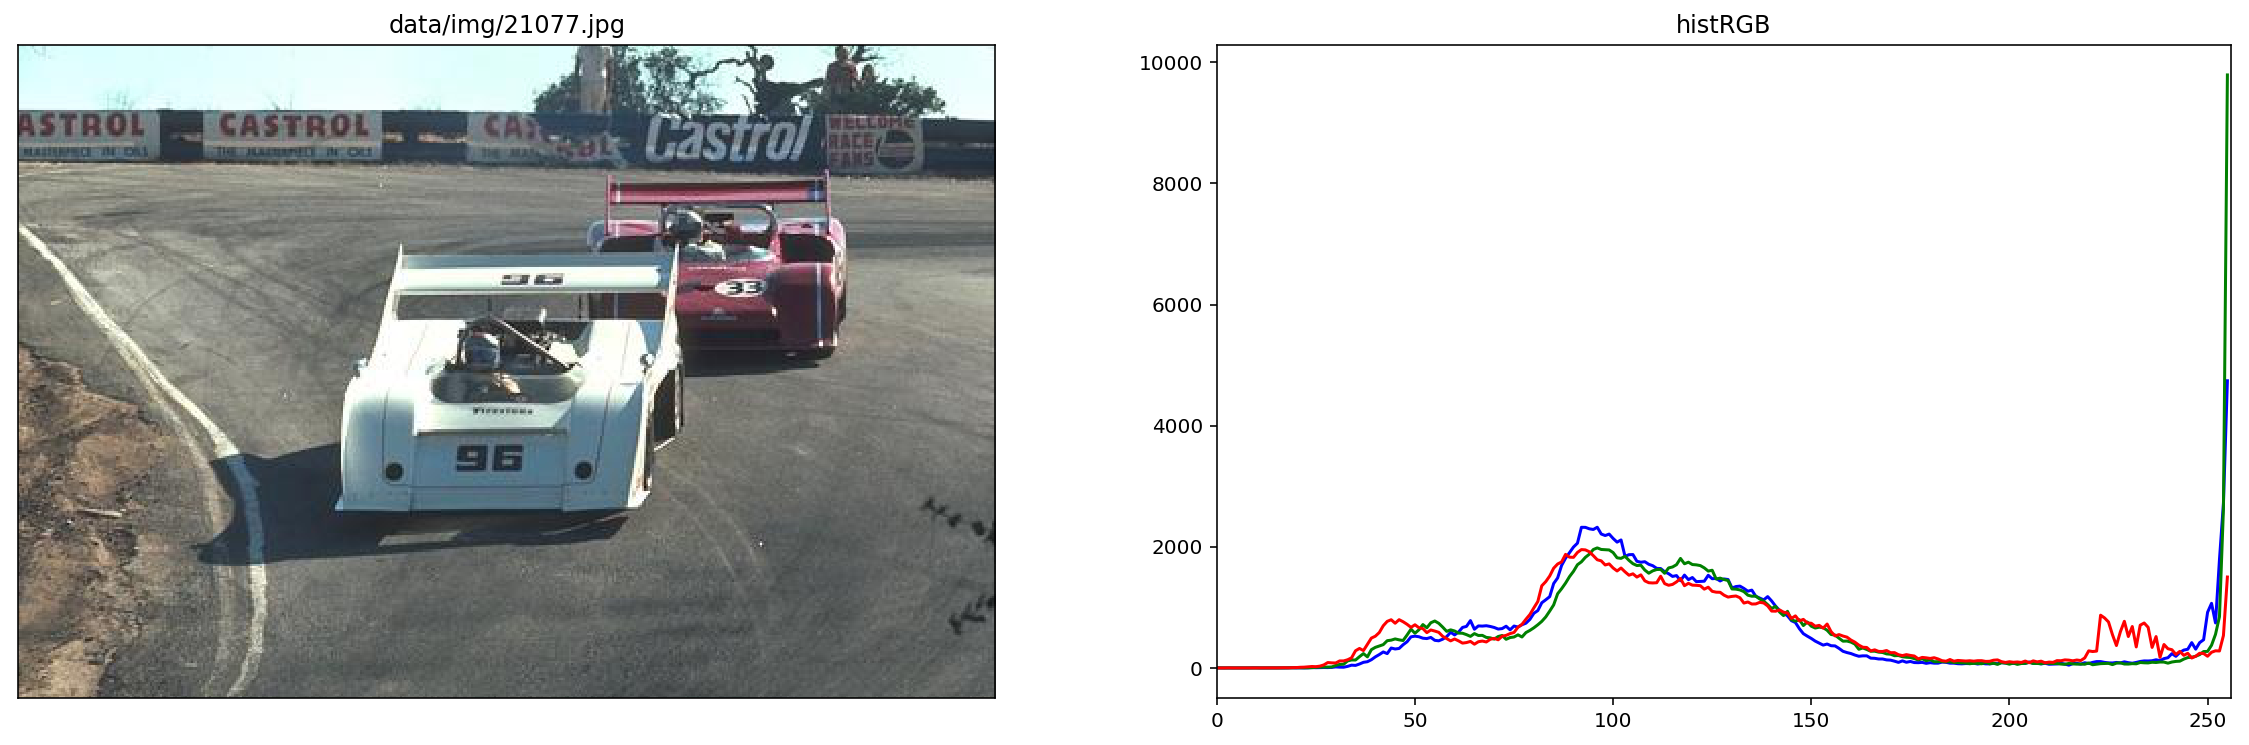

In [26]:
IMG_NAMES = ['16077.jpg', '19021.jpg', '21077.jpg'] # Take any 3 images from the dataset in "data/img"

def show_histRGB(img, imagepath):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(20, 6)) # Figure size can be adjusted.
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the corresponding rgb image using pyplot.
    plt.xticks([]), 
    plt.yticks([])
    plt.title(imagepath)
    for i, col in enumerate(color):
        # a) Calculate the histograms for this image.
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.subplot(122), plt.plot(histr, color = col) # plot histogram with the b g r channels.
        plt.xlim([0, 256])
        plt.title("histRGB")
    plt.show()
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img = cv2.imread(imagepath) # read the image from image path using opencv.
    show_histRGB(img, imagepath)

### b) What can you say about the spread of the color intensities for these images? (Please briefly answer this question in this block)

It seems that for natural images the histograms of R,G,B channels are basically similar to each other.

## 2.2 Global Histogram Equalization

/Users/fengqiaojun/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


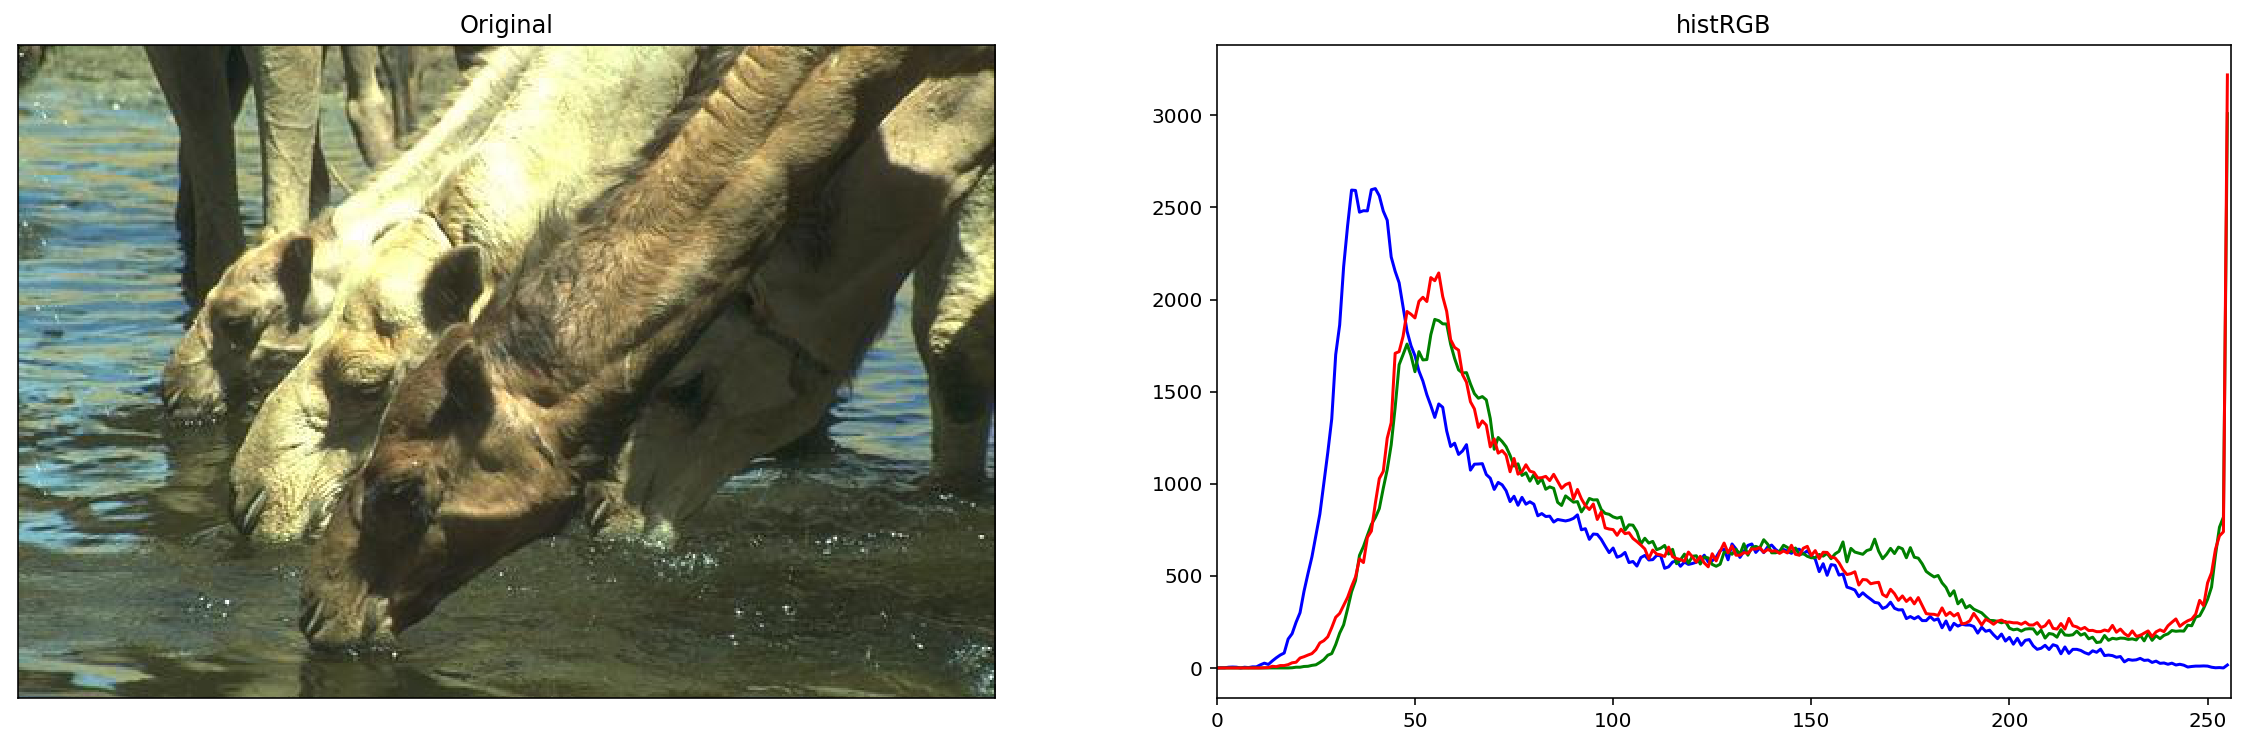

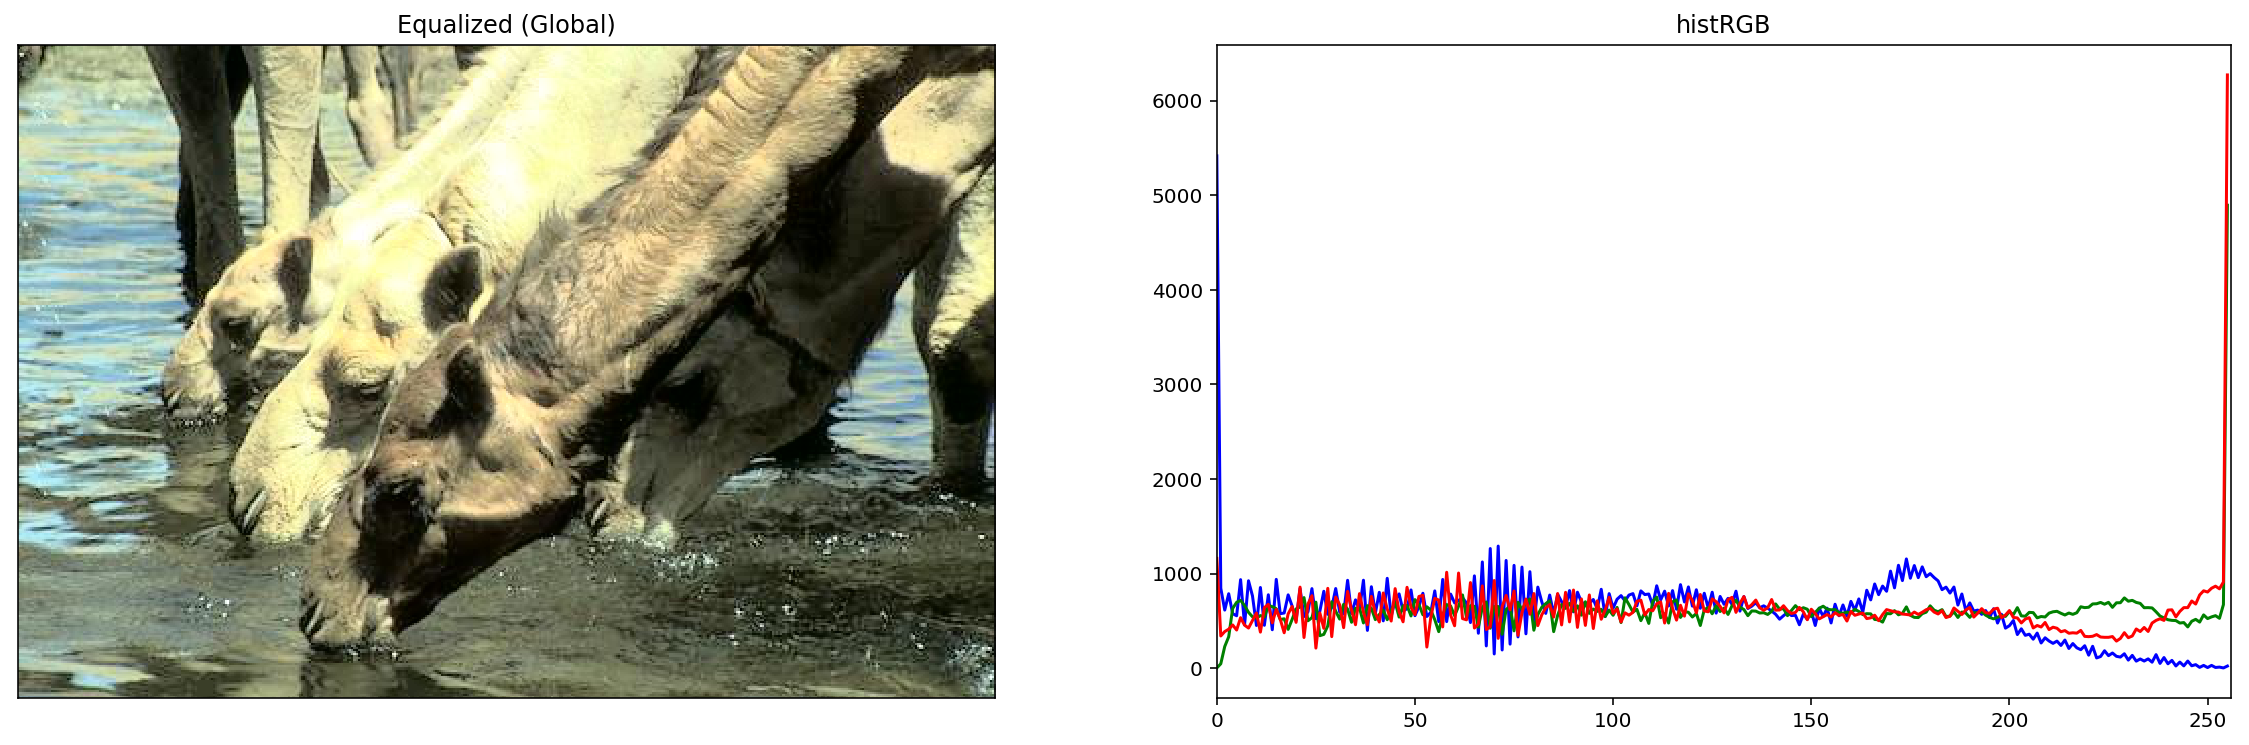

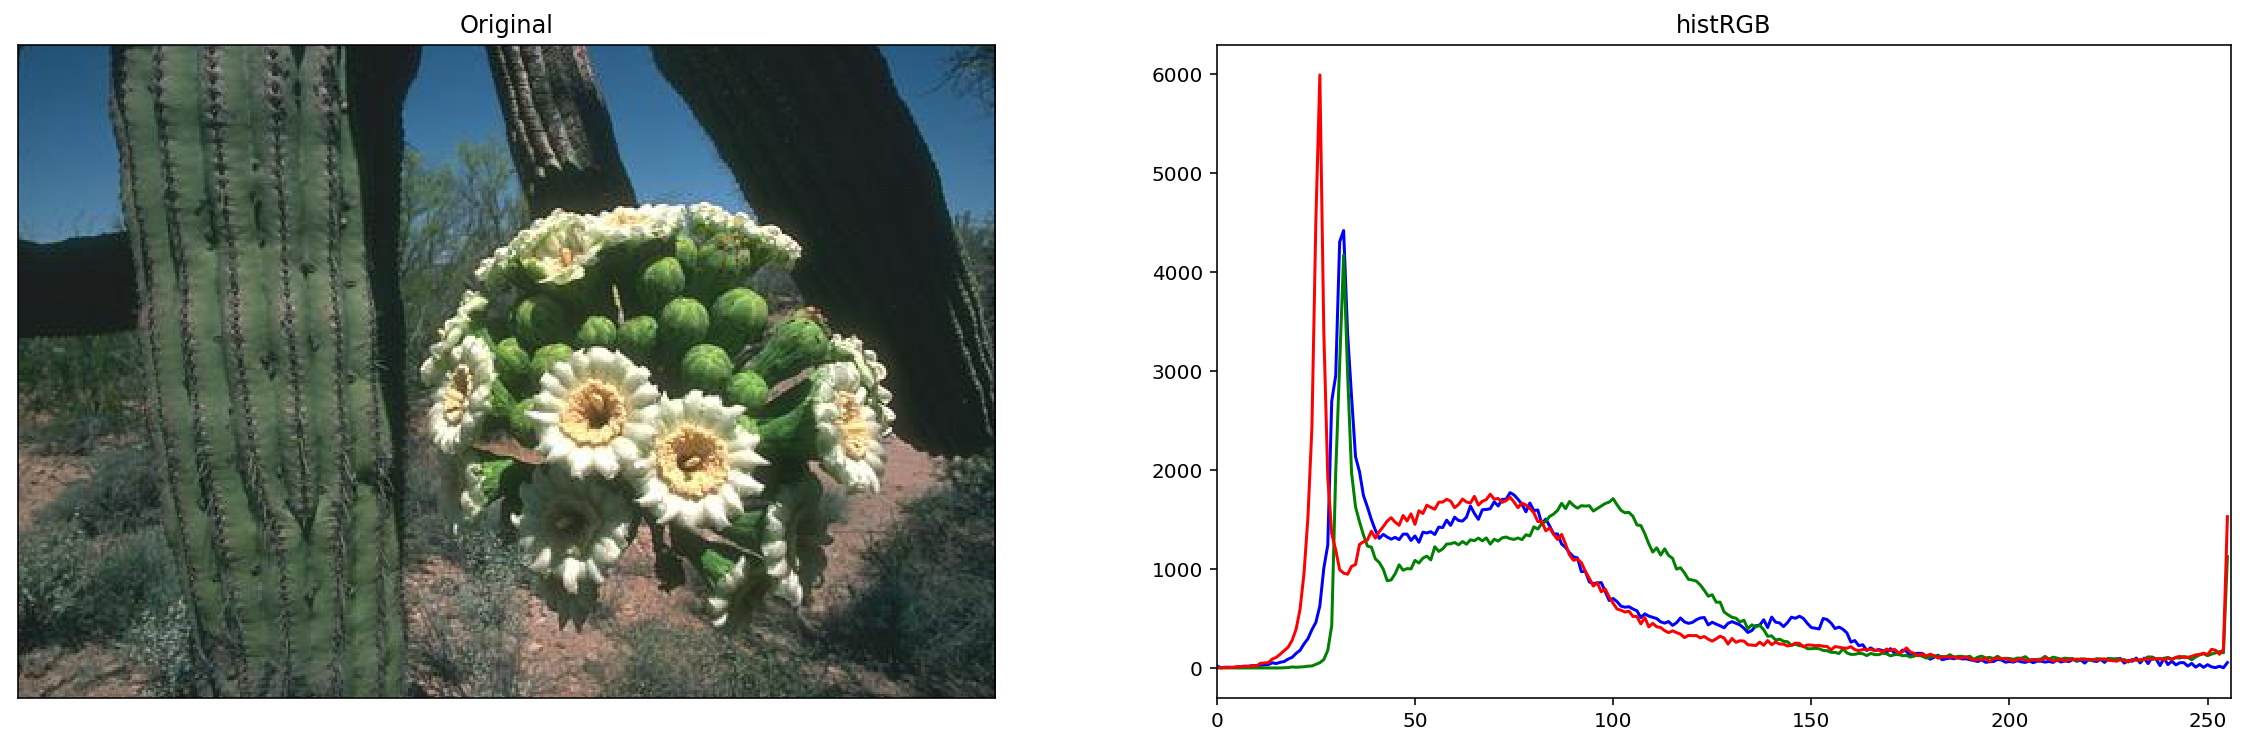

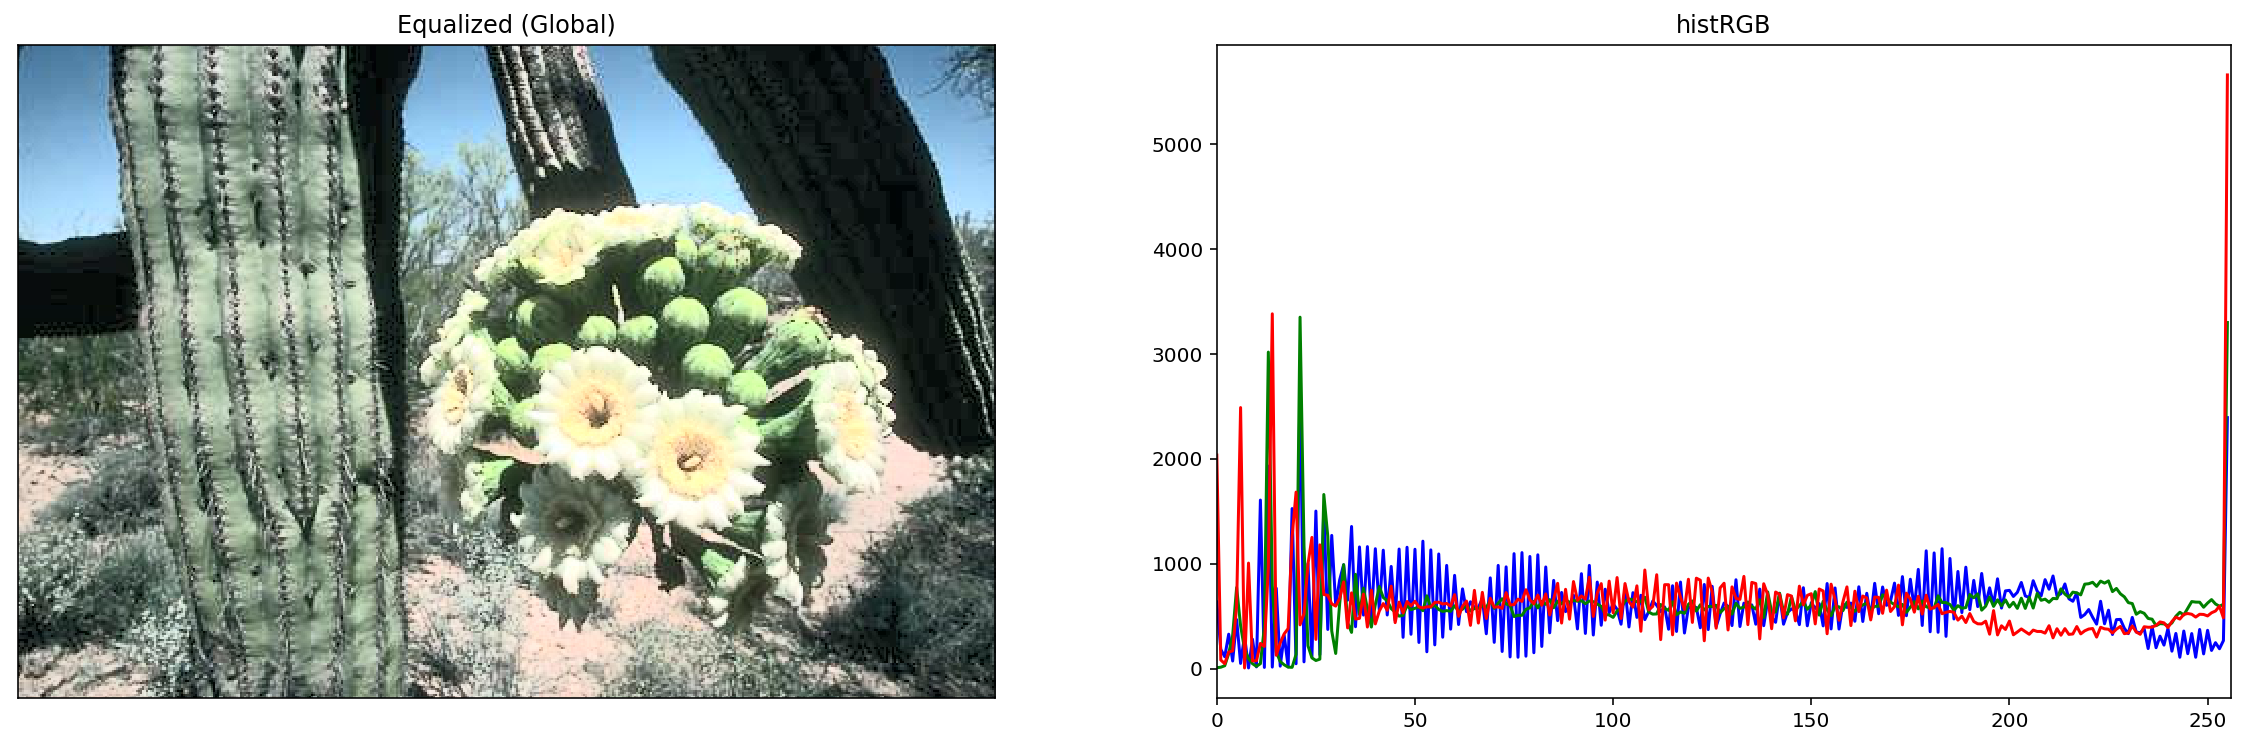

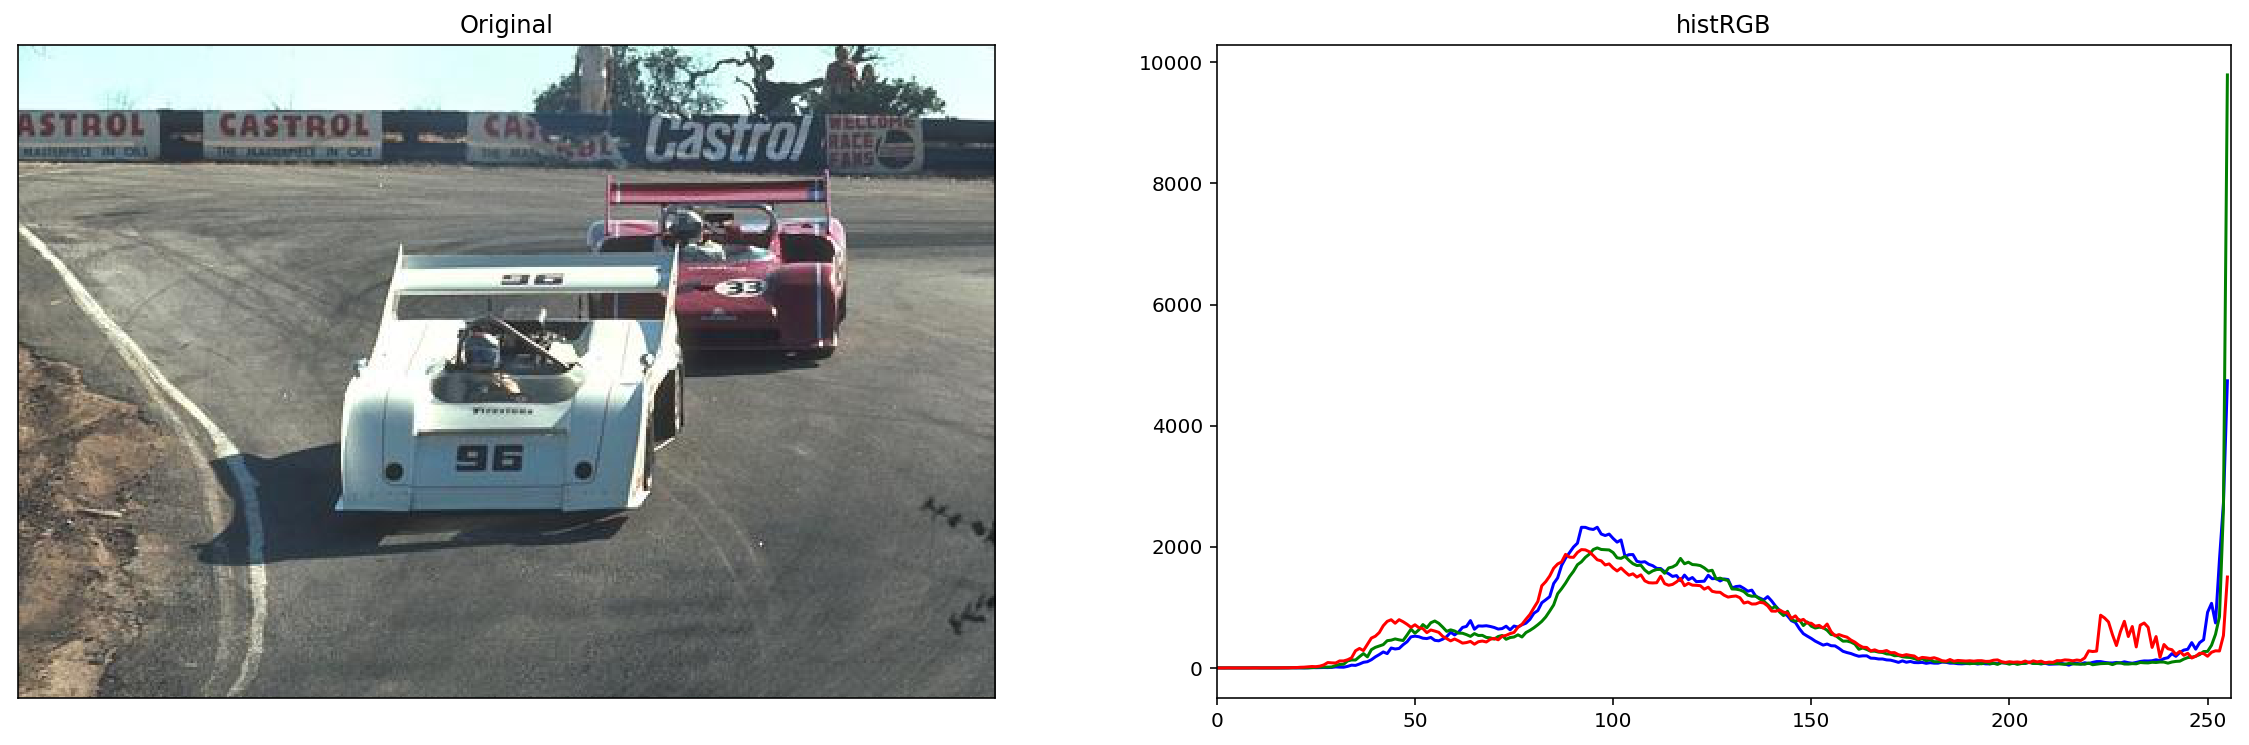

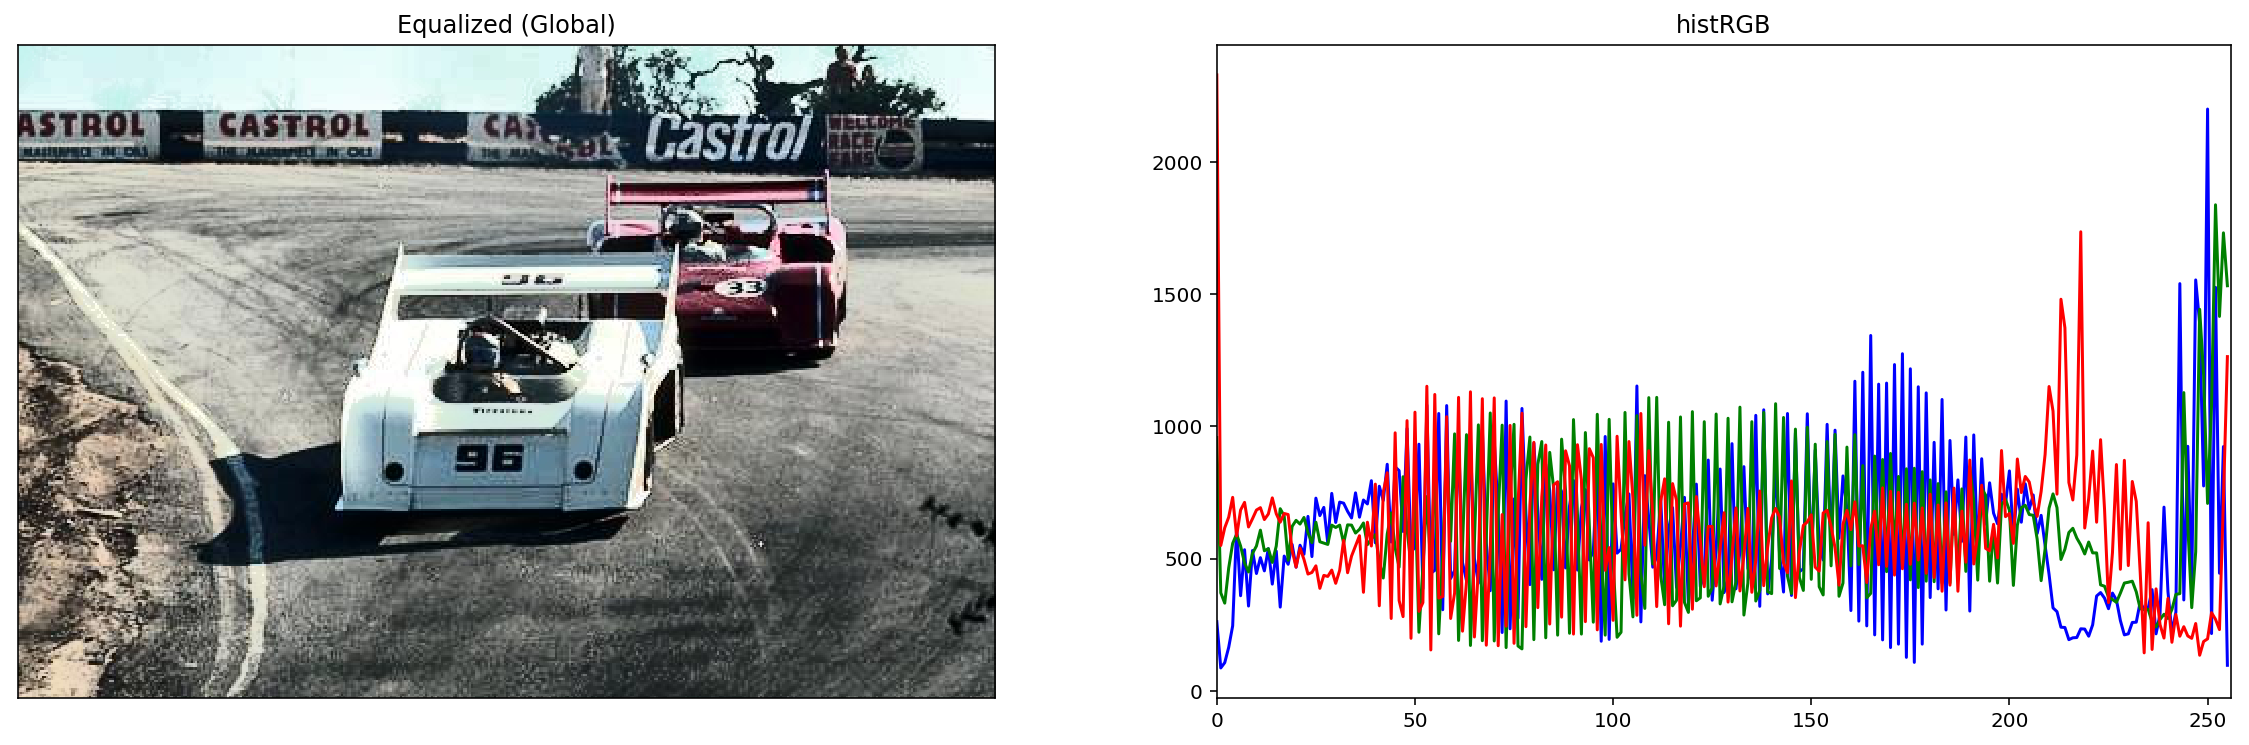

In [27]:
def histogram_equalization(imagepath):
    img = cv2.imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convert the image to YUV
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # Apply global histogram equalization on Y channel
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # Convert back to GBR 
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Global)")
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    histogram_equalization(imagepath)


## 2.3 Adaptive Histogram Equalization (CLAHE)

clipLimit=2.0, tileGridSize=(8,8)


/Users/fengqiaojun/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


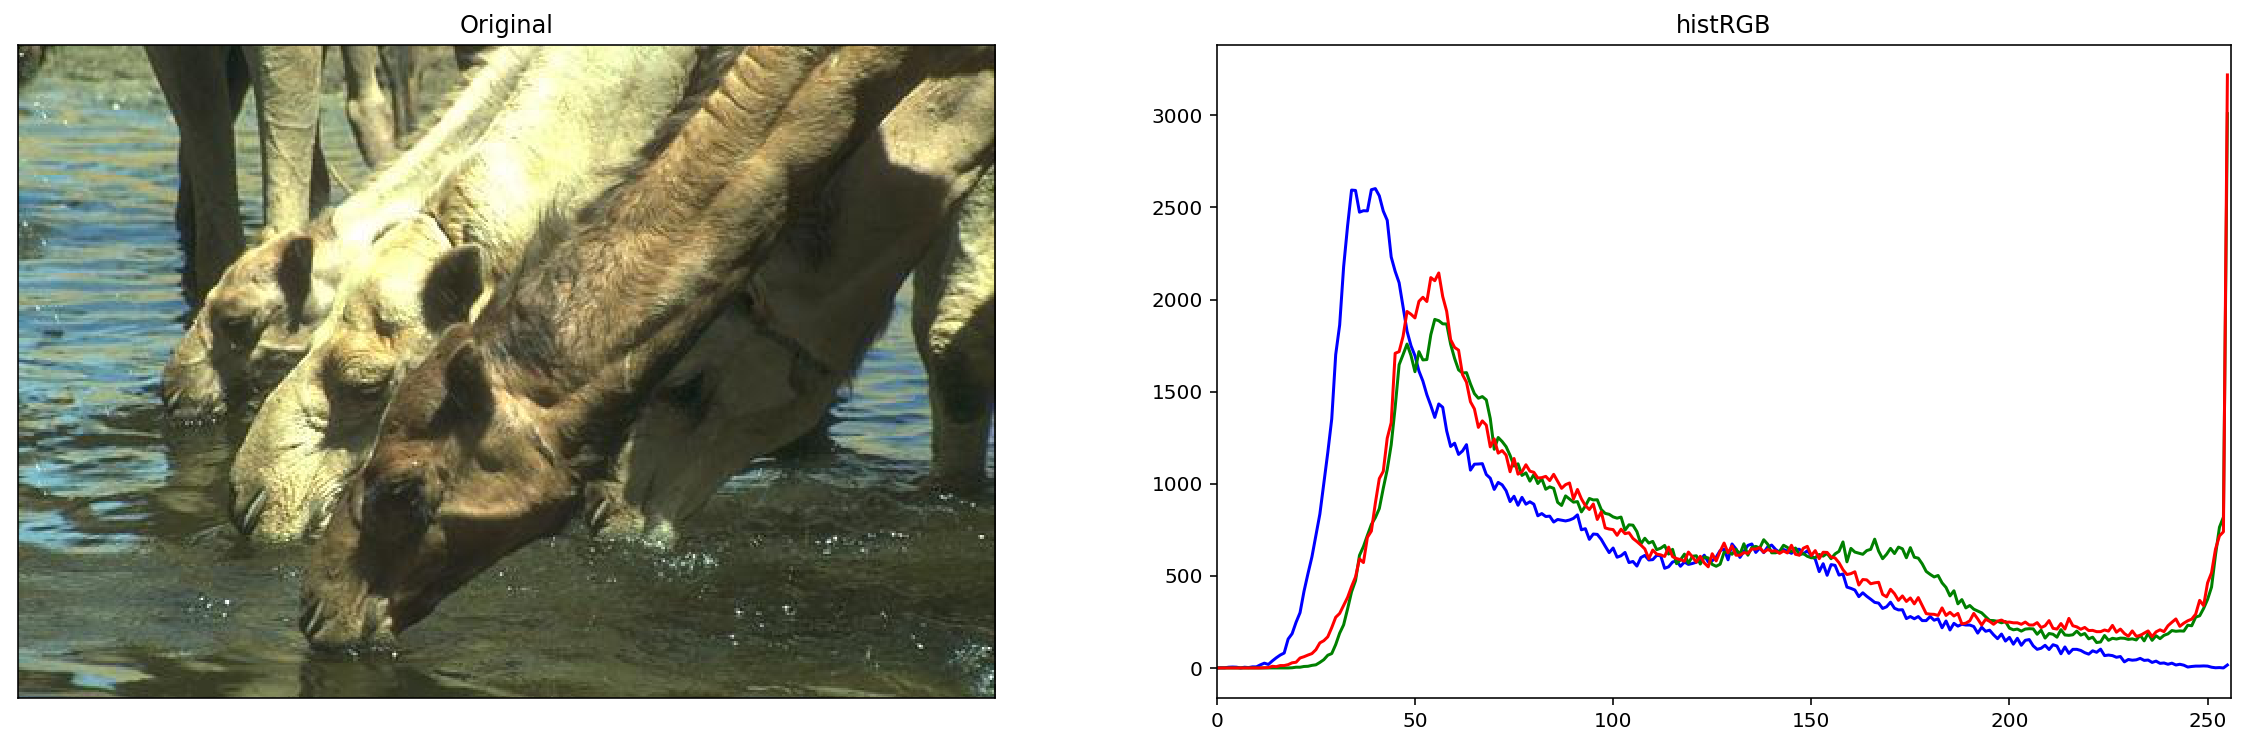

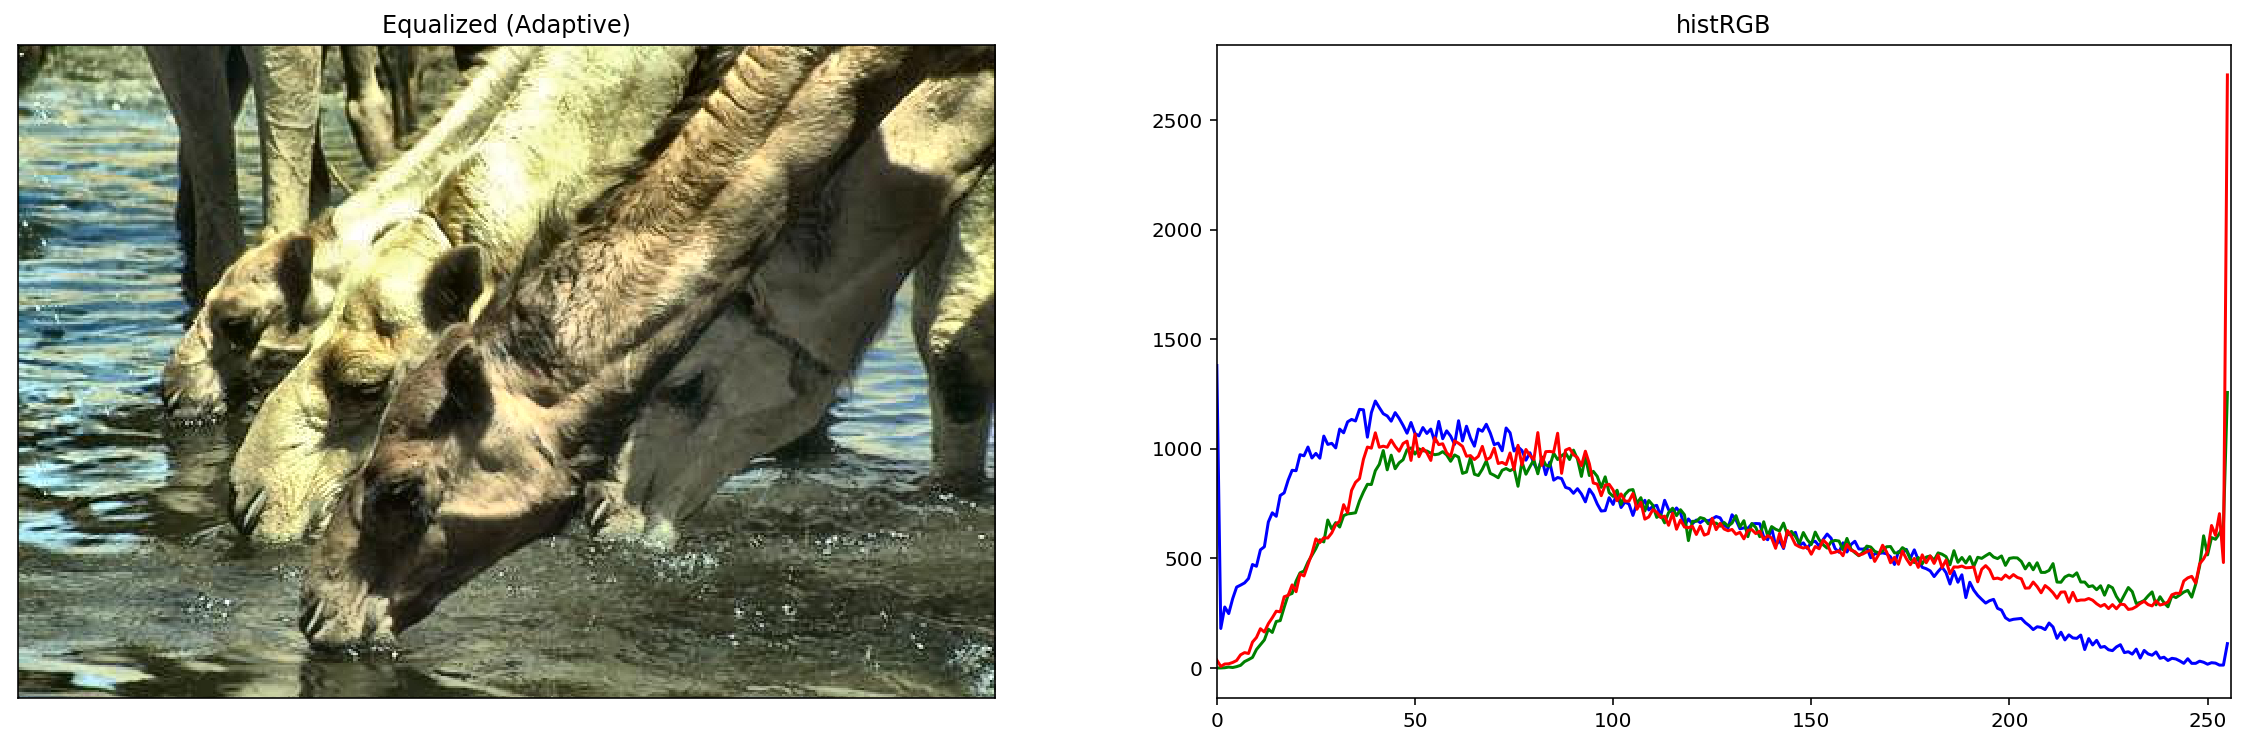

clipLimit=2.0, tileGridSize=(8,8)


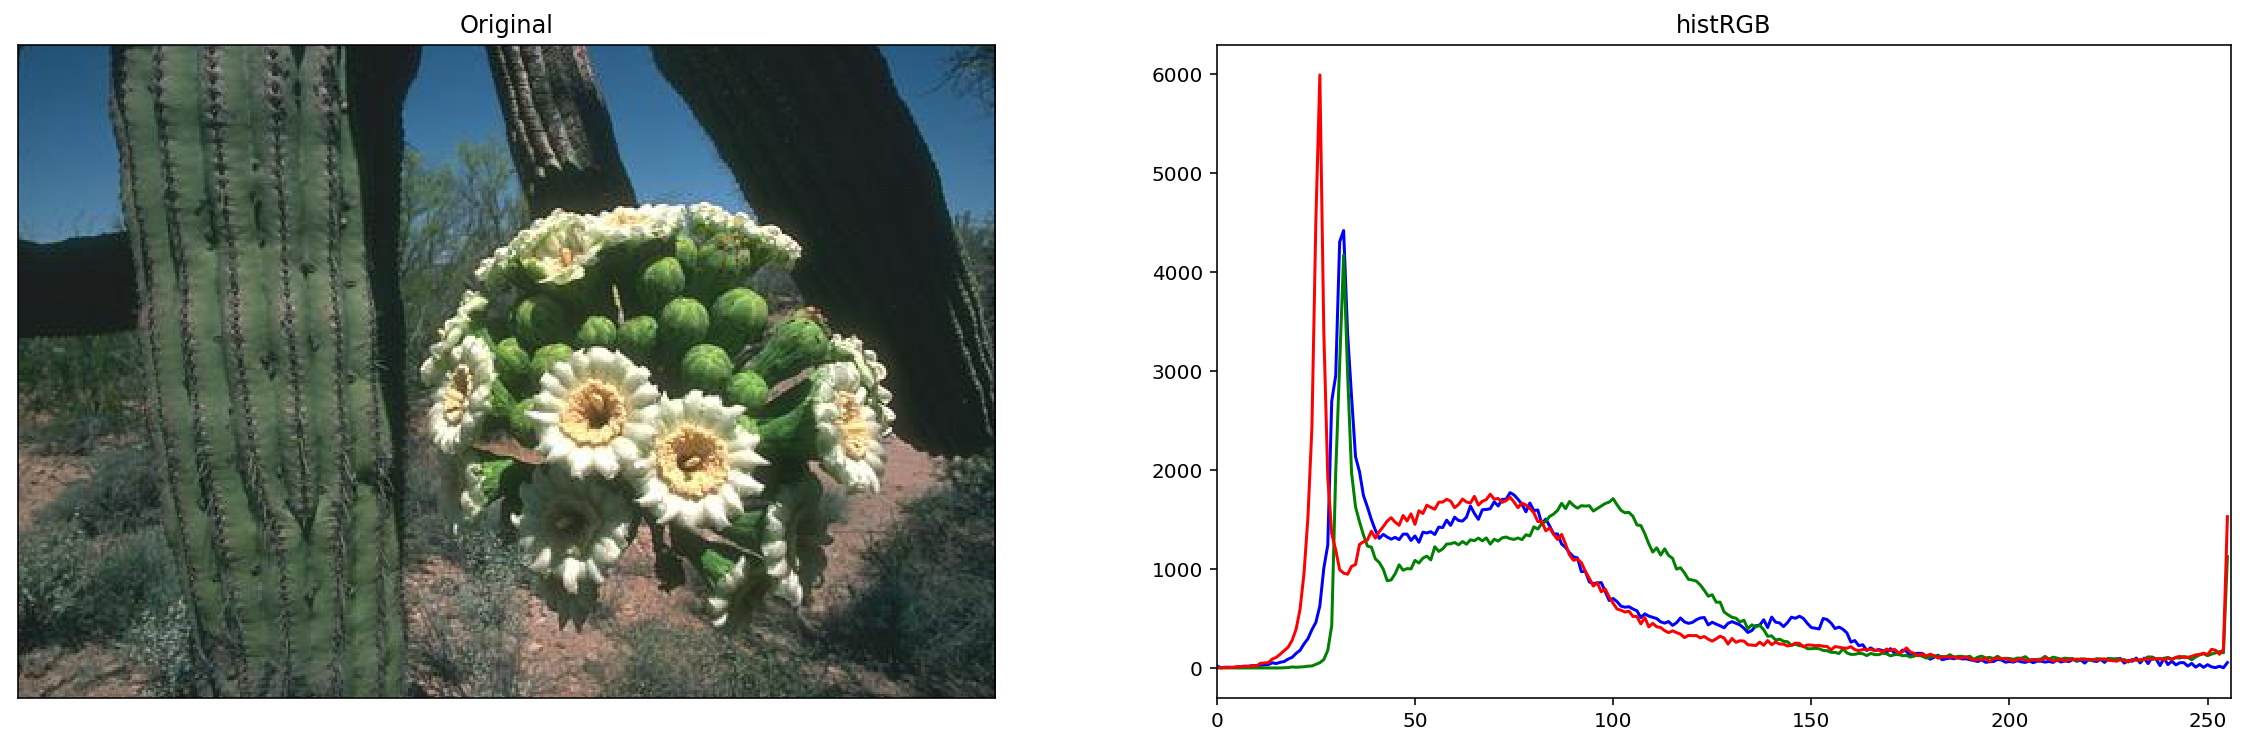

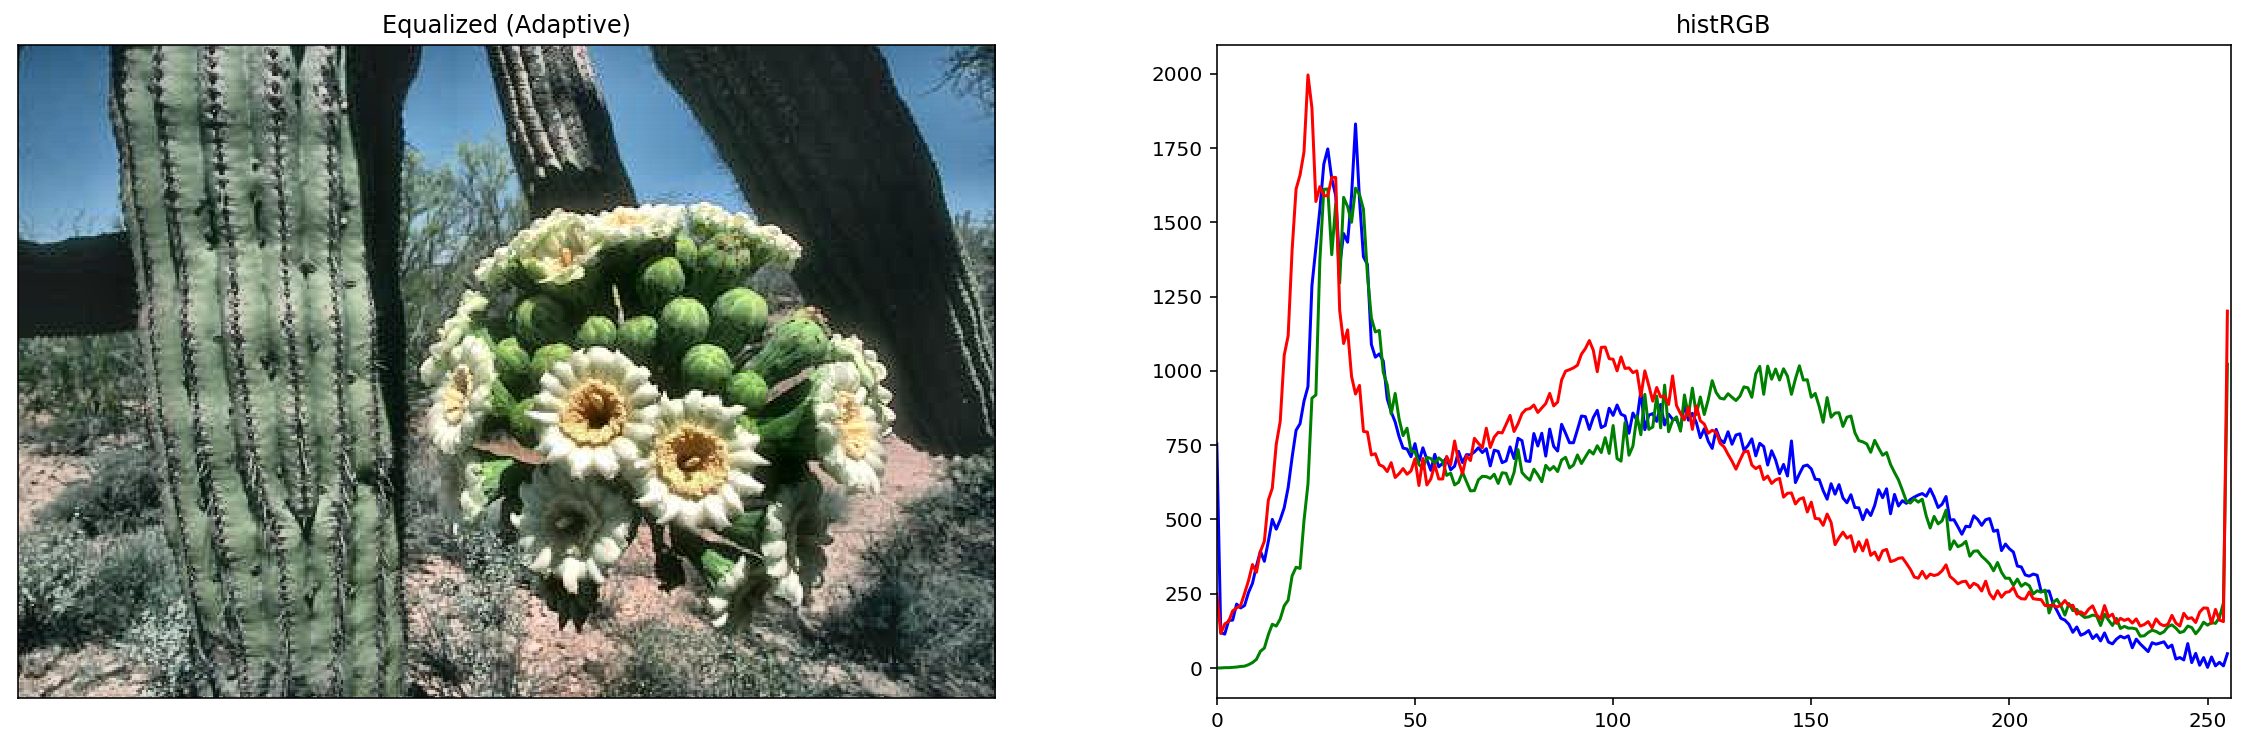

clipLimit=2.0, tileGridSize=(8,8)


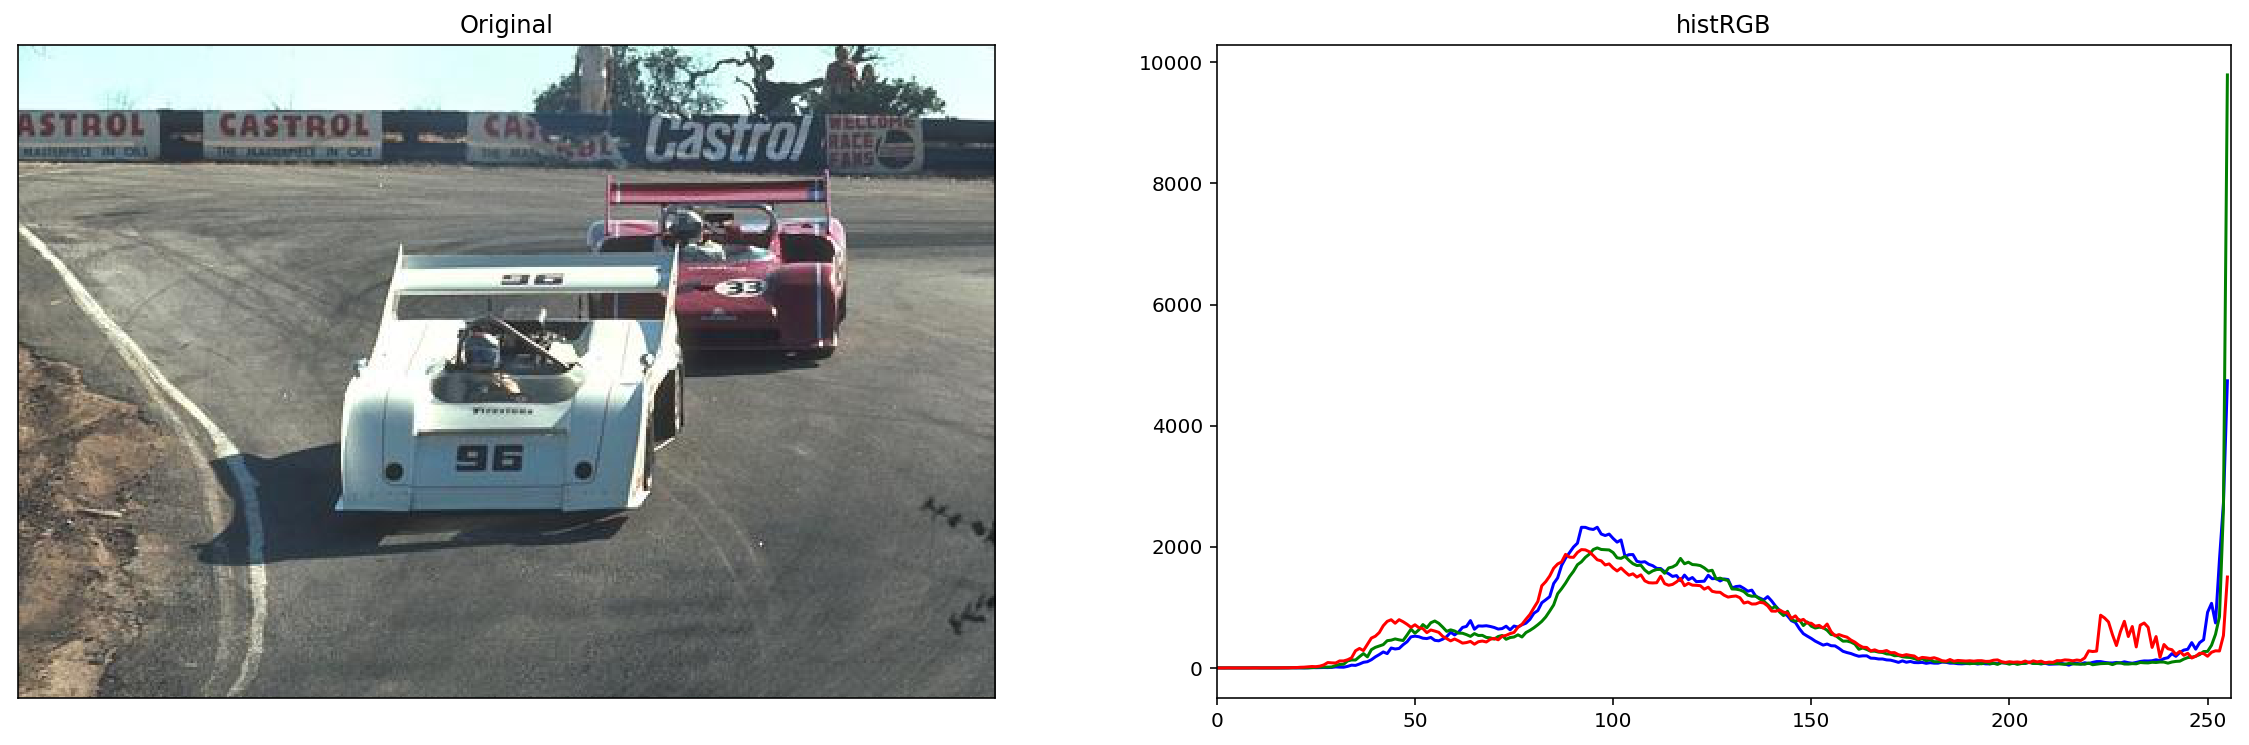

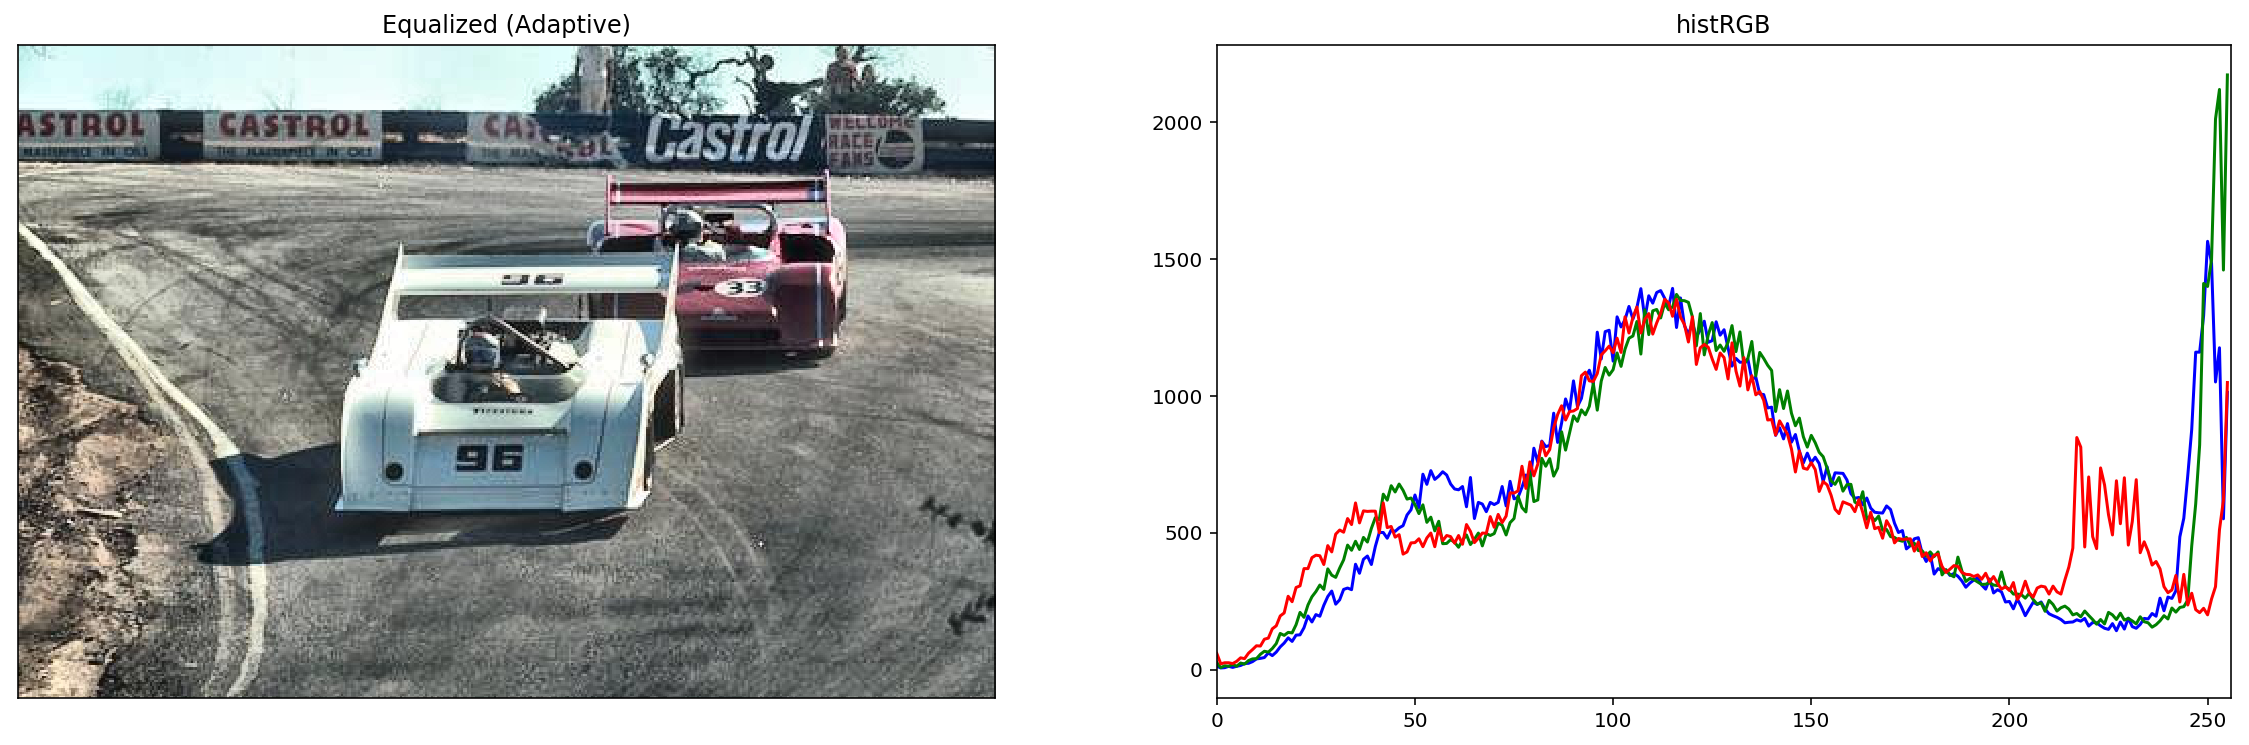

In [28]:
def adaptive_histogram_equalization(imagepath):
    img = cv2.imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # Convert the image to YUV
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # a) Create clahe    
    print ("clipLimit=%.1f, tileGridSize=(%d,%d)"%(2,8,8)) # b) Print all the hyper parameters used.
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0]) # c) Apply CLAHE onto the Y channel
    equ = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR) # Convert back to GBR
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Adaptive)")

for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    adaptive_histogram_equalization(imagepath)

###  d) Did you find any difference between the two techniques? (Please briefly answer this question in this block)

1. Global Histogram Equalization has flatter histogram than CLAHE
2. CLAHE showed better result because over-brightness is less likely to happen.